<a href="https://colab.research.google.com/github/rautnavnath/Data-Science-Machine-Learning-Projects/blob/main/Aerofit_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mindset:

Evaluation will be kept lenient, so make sure you attempt this case study.
It is understandable that you might struggle with getting started on this. Just brainstorm, discuss with peers, or get help from TAs.
There is no right or wrong answer. We have to get used to dealing with uncertainty in business. This is exactly the skill we want to develop.
About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: Aerofit_treadmill.csv

Product Purchased:	KP281, KP481, or KP781
Age:	In years
Gender:	Male/Female
Education:	In years
MaritalStatus:	Single or partnered
Usage:	The average number of times the customer plans to use the treadmill each week.
Income:	Annual income (in $)
Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
Miles:	The average number of miles the customer expects to walk/run each week
Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.
The KP481 is for mid-level runners that sell for $1,750.
The KP781 treadmill is having advanced features that sell for $2,500.
What good looks like?

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
Check correlation among different factors using heat maps or pair plots.
With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
Customer Profiling - Categorization of users.
Probability- marginal, conditional probability.
Some recommendations and actionable insights, based on the inferences.
Later on, we will see more ways to do “customer segmentation”, but this case study in itself is relevant in some real-world scenarios.

Evaluation Criteria

Defining Problem Statement and Analysing basic metrics (10 Points)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)
Visual Analysis - Univariate & Bivariate (30 Points)
For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
For categorical variable(s): Boxplot (10 Points)
For correlation: Heatmaps, Pairplots(10 Points)
Missing Value & Outlier Detection (10 Points)
Business Insights based on Non-Graphical and Visual Analysis (10 Points)
Comments on the range of attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plot
Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

#**Problem Statement:**
##Conduct a comprehensive data analysis on AeroFit's customer dataset to:

1. Create customer profiles for each AeroFit treadmill product (KP281, KP481, and KP781) based on customer characteristics to imprve recommendation to new customers
2. Calculate conditional and marginal probabilities for product purchases with respect to customer attributes.
3. Provide clear and actionable business insights and recommendations based on the analysis.

##The goal is to assist AeroFit in better understanding its customer base and improving its product recommendations for new customers.

#**Step 1: Data Import and Initial Assessment**

In [277]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [278]:
# Import the data
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [279]:
# Check the structure and characteristics of the dataset
print("Number of Rows and Columns:", df.shape)
print("\nData Types and Non-null Counts:")
print(df.info())

Number of Rows and Columns: (180, 9)

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [280]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [281]:
# Convert categorical attributes to 'category'
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Fitness'] = df['Fitness'].astype('category')

In [282]:
#chnaged Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


In [283]:
# Generate a statistical summary of the dataset
print("\nStatistical Summary of Numeric Variables:")
print(df.describe())


Statistical Summary of Numeric Variables:
              Age   Education       Usage         Income       Miles
count  180.000000  180.000000  180.000000     180.000000  180.000000
mean    28.788889   15.572222    3.455556   53719.577778  103.194444
std      6.943498    1.617055    1.084797   16506.684226   51.863605
min     18.000000   12.000000    2.000000   29562.000000   21.000000
25%     24.000000   14.000000    3.000000   44058.750000   66.000000
50%     26.000000   16.000000    3.000000   50596.500000   94.000000
75%     33.000000   16.000000    4.000000   58668.000000  114.750000
max     50.000000   21.000000    7.000000  104581.000000  360.000000


#**Step 2: Non-Graphical Analysis**

In [284]:
# Value counts and unique attributes for categorical variables

# For Gender
gender_counts = df['Gender'].value_counts()
print("\nGender Value Counts:")
print(gender_counts)

# For MaritalStatus
marital_counts = df['MaritalStatus'].value_counts()
print("\nMaritalStatus Value Counts:")
print(marital_counts)

# For Product Purchased
product_counts = df['Product'].value_counts()
print("\nProduct Purchased Value Counts:")
print(product_counts)

# For Education (assuming it's categorical)
unique_education = df['Education'].value_counts()
print("\nUnique Education Levels:")
print(unique_education)



Gender Value Counts:
Male      104
Female     76
Name: Gender, dtype: int64

MaritalStatus Value Counts:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Product Purchased Value Counts:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Unique Education Levels:
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64


#**Step 3: Visual Analysis - Univariate & Bivariate**

##Univariate analysis for continuous variables

<Figure size 1000x500 with 0 Axes>

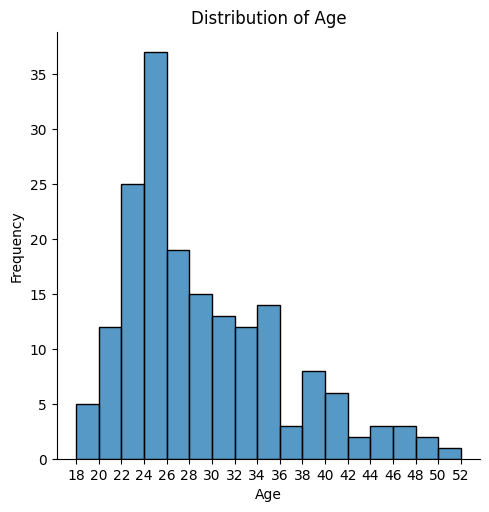

In [285]:
# Distplot for 'Age'
plt.figure(figsize=(10, 5))
sns.displot(df['Age'], bins=np.arange(18,53,2))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.xticks(np.arange(18,53,2),np.arange(18,53,2))
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x2000 with 0 Axes>

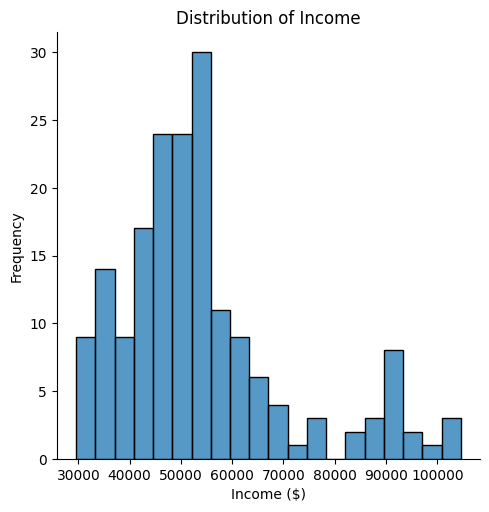

In [286]:
# Distplot for 'Income'
#min_income=df['Income'].min()
#max_income=df['Income'].max()
plt.figure(figsize=(10, 20))
sns.displot(df['Income'], kde=False, bins=20)
#plt.xticks(np.arange(min_income,max_income,5),np.arange(min_income,max_income,5))
plt.title('Distribution of Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x500 with 0 Axes>

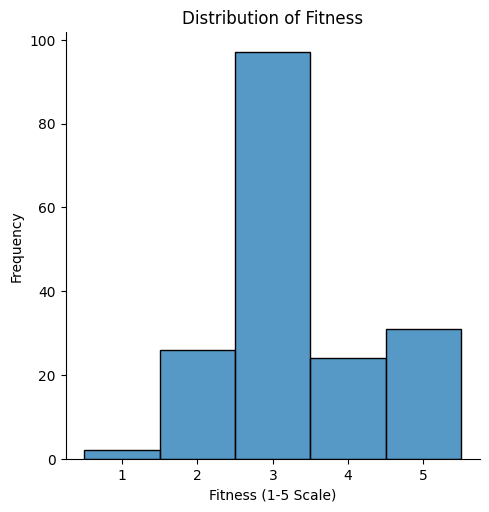

In [287]:
# Distplot for 'Fitness'
bins_Fitness=df['Fitness'].nunique()
plt.figure(figsize=(8, 5))
sns.displot(df['Fitness'], kde=False, bins=bins_Fitness)
plt.title('Distribution of Fitness')
plt.xlabel('Fitness (1-5 Scale)')
plt.ylabel('Frequency')
plt.show()

In [288]:
# Convert 'Gender' column to categorical data type
df['Gender'] = df['Gender'].astype('category')

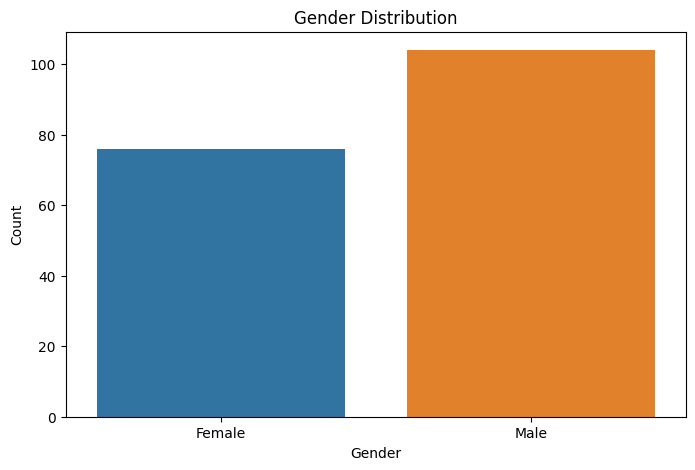

In [289]:
# Countplot for 'Gender'
plt.figure(figsize=(8, 5))
sns.countplot(df,x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##**Bivariate analysis for categorical variables**

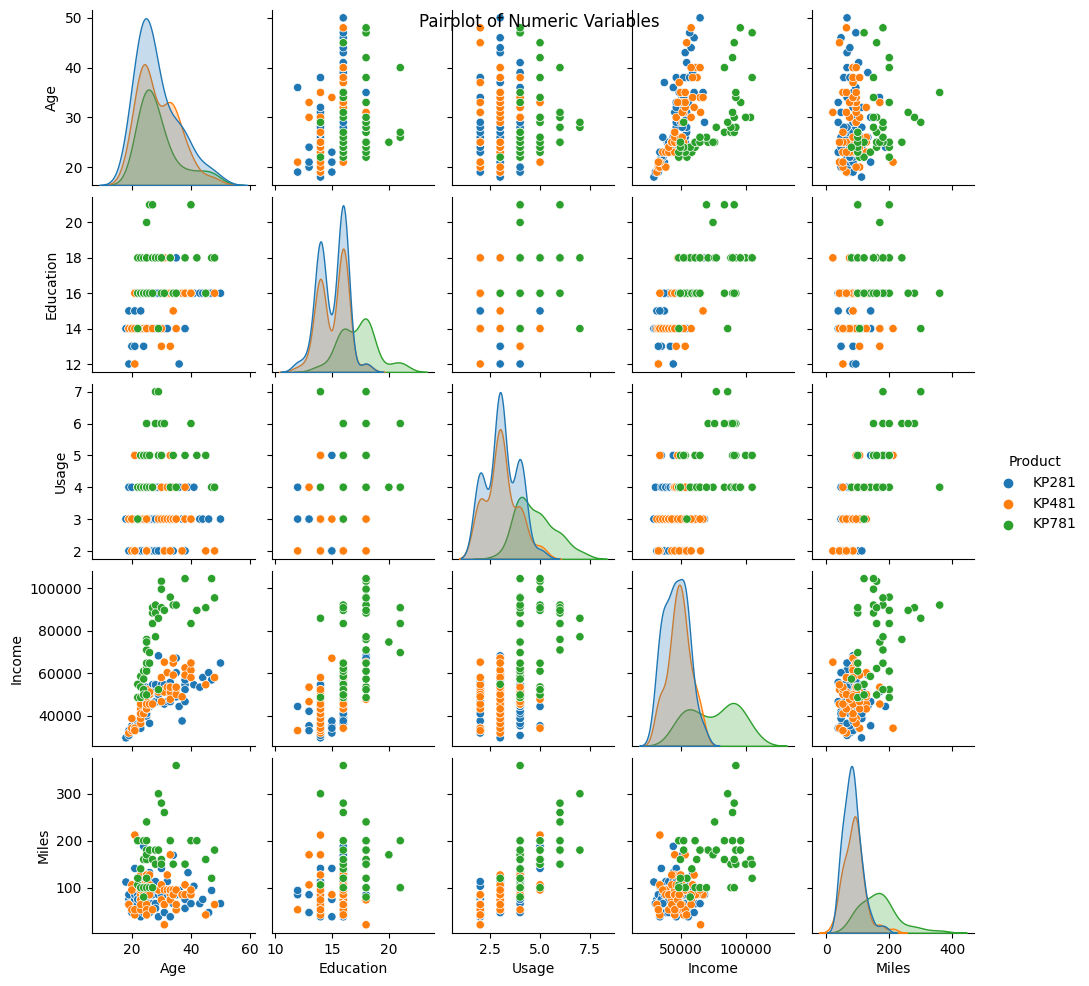

In [290]:
# Pairplot for numeric variables
sns.pairplot(data=df, height=2, hue='Product')
plt.suptitle('Pairplot of Numeric Variables')
plt.show()

<ipython-input-291-0ecf26c63336>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='rocket_r')


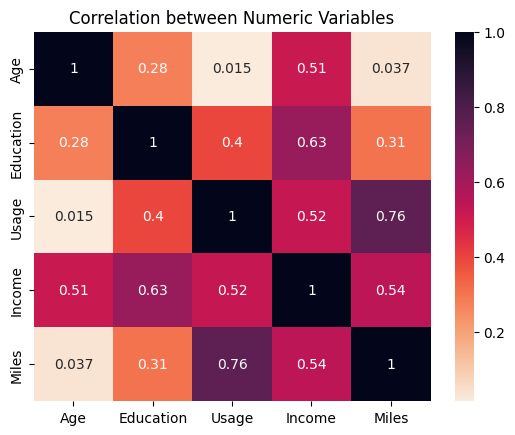

In [291]:
# Heatmap for numeric variables
sns.heatmap(df.corr(), annot=True, cmap='rocket_r')
plt.title('Correlation between Numeric Variables')
plt.show()

#**Step 4: Missing Value & Outlier Detection**

In [292]:
# Missing Value Detection
missing_values = df.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values)


Missing Values in the Dataset:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


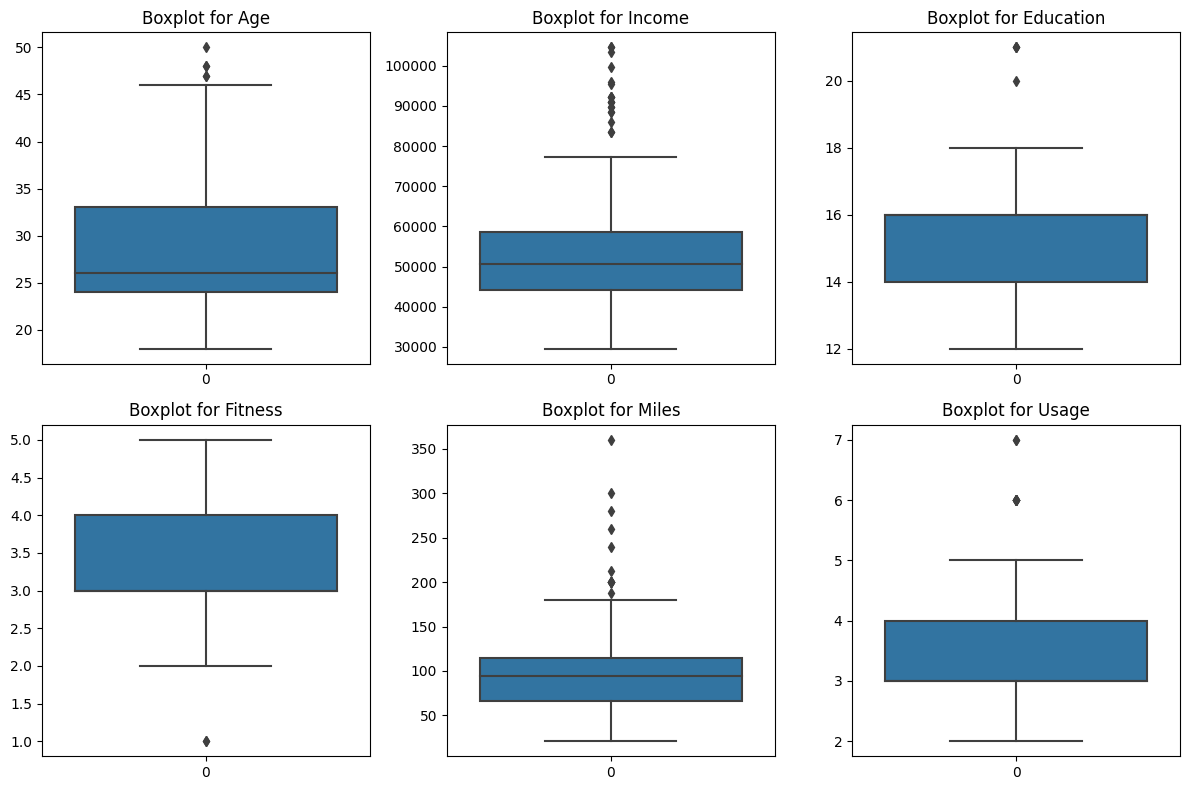

In [293]:
# Outlier Detection using boxplots (for numeric variables)

# Create subplots for outlier detection using boxplots (for numeric variables)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Boxplot for 'Age'
sns.boxplot(data=df['Age'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot for Age')

# Boxplot for 'Income'
sns.boxplot(data=df['Income'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot for Income')

# Boxplot for 'Education'
sns.boxplot(data=df['Education'], ax=axes[0, 2])
axes[0, 2].set_title('Boxplot for Education')

# Boxplot for 'Fitness'
sns.boxplot(data=df['Fitness'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Fitness')

# Boxplot for 'Miles'
sns.boxplot(data=df['Miles'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Miles')

# Boxplot for 'Usage'
sns.boxplot(data=df['Usage'], ax=axes[1, 2])
axes[1, 2].set_title('Boxplot for Usage')

# Adjust layout
plt.tight_layout()

plt.show()


#**Probabilities for each group vs product**

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


##**Crosstab For Categorical Variables**


Gender vs. Product (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Gender'>

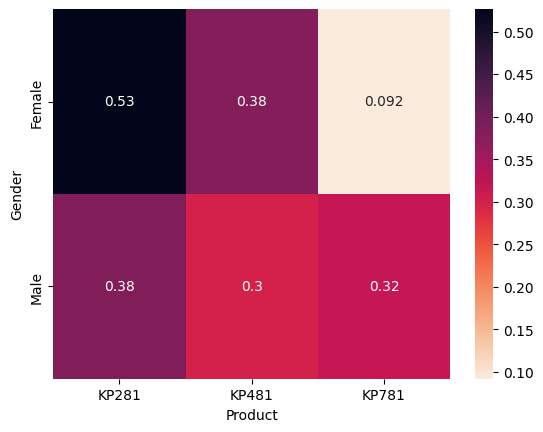

In [295]:
# Relationship between Gender and Product
gender_product_crosstab = pd.crosstab(df['Gender'], df['Product'], normalize='index')
print("\nGender vs. Product (Conditional Probabilities):")
sns.heatmap(gender_product_crosstab,cmap='rocket_r', annot=True)


MaritalStatus vs. Product (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='MaritalStatus'>

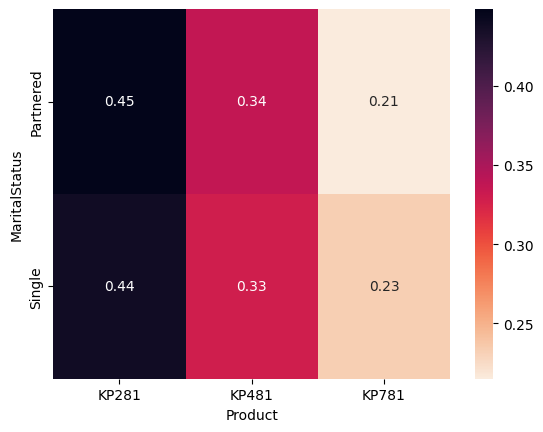

In [296]:
# Relationship between MaritalStatus and Product
marital_product_crosstab = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index')
print("\nMaritalStatus vs. Product (Conditional Probabilities):")
sns.heatmap(marital_product_crosstab,cmap='rocket_r', annot=True)


Fitness vs. Product (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Fitness'>

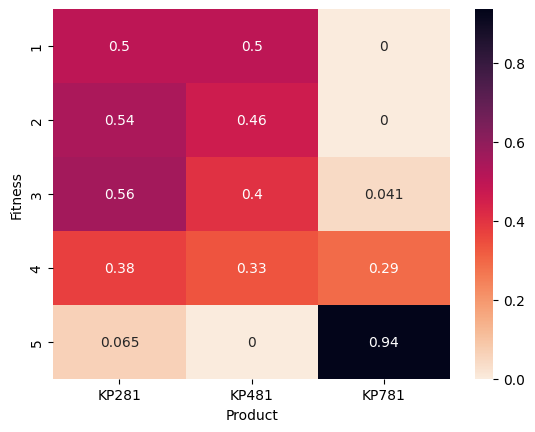

In [297]:
# Relationship between Fitness and Product
fitness_product_crosstab = pd.crosstab(df['Fitness'], df['Product'], normalize='index')
print("\nFitness vs. Product (Conditional Probabilities):")
sns.heatmap(fitness_product_crosstab,cmap='rocket_r', annot=True)


##**Crosstab Probabilities for Numerical Variables**

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    category
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(4), int64(5)
memory usage: 8.4 KB


In [299]:
df.agg(['min','max'])

<ipython-input-299-f252ea29dae6>:1: FutureWarning: ['Product', 'Gender', 'MaritalStatus', 'Fitness'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['min','max'])


,Age,Education,Usage,Income,Miles
min,18,12,2,29562,21
max,50,21,7,104581,360


In [300]:
#binn the data
df['Age'] = pd.cut(df['Age'], bins=[18,30,40,51], labels=['Young','Middle','Over40'], include_lowest=True)
df['Education'] = pd.cut(df['Education'], bins=[11,15,18,22], labels=['Low','Middle','High'], include_lowest=True)
df['Usage'] = pd.cut(df['Usage'], bins=[1,3,5,8], labels=['low','medium','high'], include_lowest=True)
df['Income'] = pd.cut(df['Income'], bins=[25000,60000,90000,120000], labels=['Low','Middle','High'], include_lowest=True)
df['Miles'] = pd.cut(df['Miles'], bins=[18,100,200,300], labels=['Low','Medium','High'], include_lowest=True)


Age Group vs. Product Purchased (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Age'>

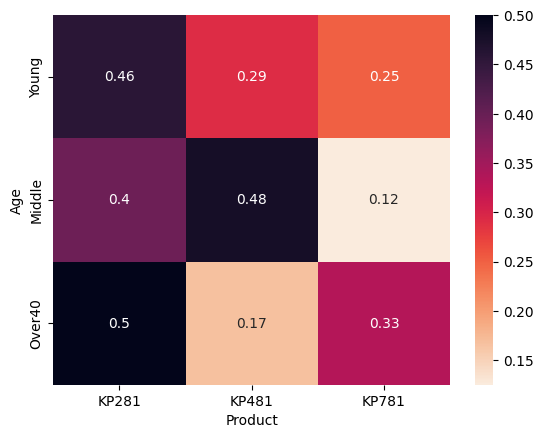

In [301]:
# Crosstab for Age Group vs. Product Purchased (Conditional Probabilities)
age_group_product_crosstab = pd.crosstab(df['Age'], df['Product'], normalize='index')
print("\nAge Group vs. Product Purchased (Conditional Probabilities):")
sns.heatmap(age_group_product_crosstab,cmap='rocket_r', annot=True)


Education Group vs. Product Purchased (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Education'>

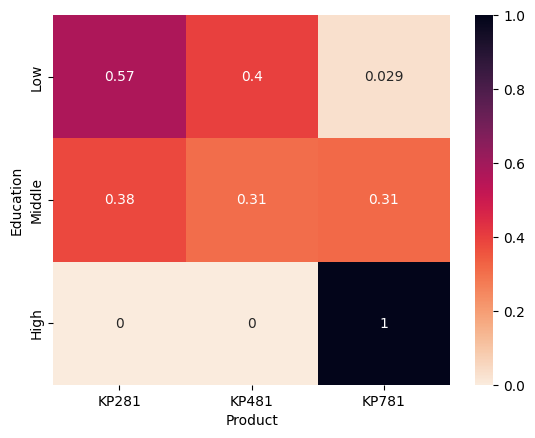

In [302]:
# Crosstab for Education Group vs. Product Purchased (Conditional Probabilities)
Education_group_product_crosstab = pd.crosstab(df['Education'], df['Product'], normalize='index')
print("\nEducation Group vs. Product Purchased (Conditional Probabilities):")
sns.heatmap(Education_group_product_crosstab,cmap='rocket_r', annot=True)


Usage Group vs. Product Purchased (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Usage'>

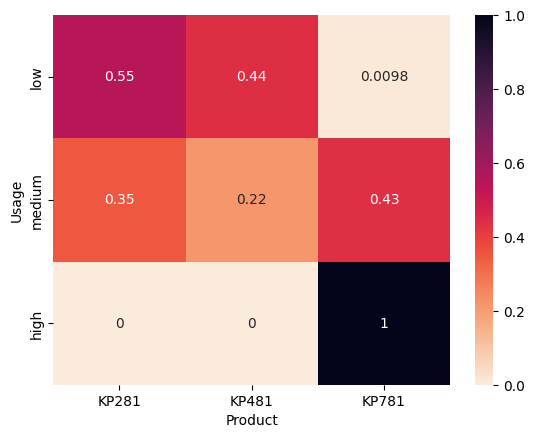

In [303]:
# Crosstab for Usage Group vs. Product Purchased (Conditional Probabilities)
Usage_group_product_crosstab = pd.crosstab(df['Usage'], df['Product'], normalize='index')
print("\nUsage Group vs. Product Purchased (Conditional Probabilities):")
sns.heatmap(Usage_group_product_crosstab,cmap='rocket_r', annot=True)


Income Group vs. Product Purchased (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Income'>

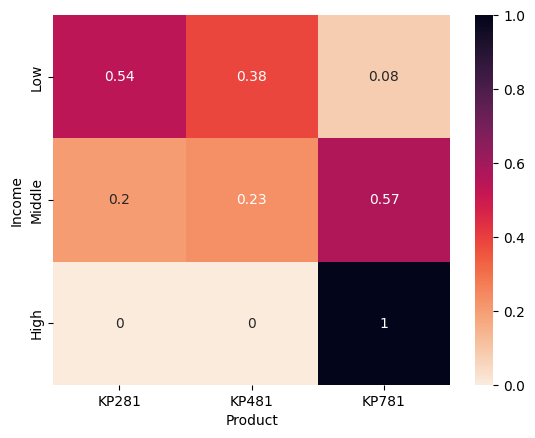

In [304]:
# Crosstab for Income Group vs. Product Purchased (Conditional Probabilities)
Income_group_product_crosstab = pd.crosstab(df['Income'], df['Product'], normalize='index')
print("\nIncome Group vs. Product Purchased (Conditional Probabilities):")
sns.heatmap(Income_group_product_crosstab,cmap='rocket_r', annot=True)


Miles Group vs. Product Purchased (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Miles'>

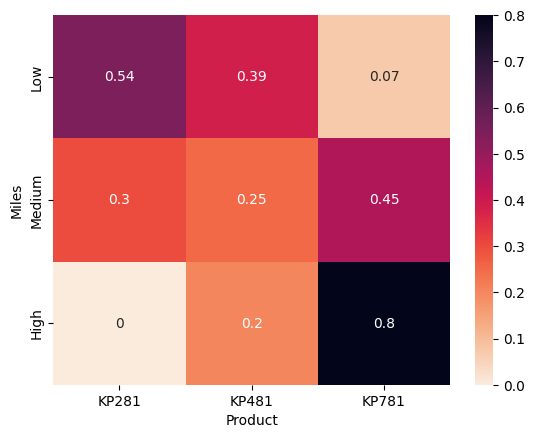

In [305]:
# Crosstab for Miles Group vs. Product Purchased (Conditional Probabilities)
Miles_group_product_crosstab = pd.crosstab(df['Miles'], df['Product'], normalize='index')
print("\nMiles Group vs. Product Purchased (Conditional Probabilities):")
sns.heatmap(Miles_group_product_crosstab,cmap='rocket_r', annot=True)

#Segmentation


Segment Characteristics:
                                        Age        Income   Fitness  \
Segment                                                               
Segment 1: Young and Low Income   26.369565  47189.702899  3.115942   
Segment 2: Young and High Income  28.941176  87736.882353  4.705882   
Segment 3: Older and Low Income   41.631579  57747.631579  3.000000   
Segment 4: Older and High Income  43.333333  94768.833333  4.833333   

                                       Miles  
Segment                                       
Segment 1: Young and Low Income    92.550725  
Segment 2: Young and High Income  195.294118  
Segment 3: Older and Low Income    77.526316  
Segment 4: Older and High Income  168.333333  

Segmented Group vs. Product Purchased (Conditional Probabilities):


<Axes: xlabel='Product', ylabel='Segment'>

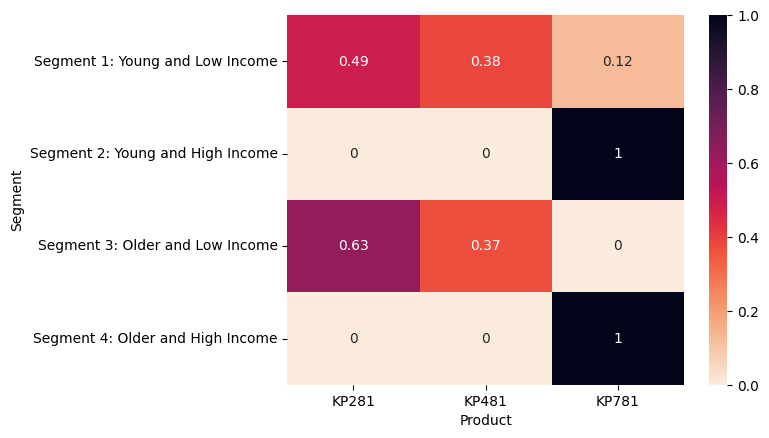

In [306]:
#Segmentation based on Numerical Attributes

# Import the data
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

def segmentation_criteria(row):
    if row['Age'] < 38 and row['Income'] < 70000:
        return 'Segment 1: Young and Low Income'
    elif row['Age'] < 38 and row['Income'] >= 70000:
        return 'Segment 2: Young and High Income'
    elif row['Age'] >= 38 and row['Income'] < 70000:
        return 'Segment 3: Older and Low Income'
    else:
        return 'Segment 4: Older and High Income'

# Apply segmentation criteria to create segments
df['Segment'] = df.apply(segmentation_criteria, axis=1)

# Analyze segment characteristics
segment_means = df.groupby('Segment')[['Age', 'Income', 'Fitness', 'Miles']].mean()
print("\nSegment Characteristics:")
print(segment_means)

# Crosstab for Segmented Group vs. Product Purchased (Conditional Probabilities)
Segmented_group_product_crosstab = pd.crosstab(df['Segment'], df['Product'], normalize='index')
print("\nSegmented Group vs. Product Purchased (Conditional Probabilities):")
sns.heatmap(Segmented_group_product_crosstab,cmap='rocket_r', annot=True)

#**Step 5: Business Insights based on Non-Graphical and Visual Analysis**

In [307]:
print(gender_product_crosstab)
print(marital_product_crosstab)
print(fitness_product_crosstab)
print(age_group_product_crosstab)
print(Education_group_product_crosstab)
print(Usage_group_product_crosstab)
print(Income_group_product_crosstab)
print(Miles_group_product_crosstab)



Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877
Product     KP281     KP481     KP781
Fitness                              
1        0.500000  0.500000  0.000000
2        0.538462  0.461538  0.000000
3        0.556701  0.402062  0.041237
4        0.375000  0.333333  0.291667
5        0.064516  0.000000  0.935484
Product     KP281     KP481     KP781
Age                                  
Young    0.458333  0.291667  0.250000
Middle   0.395833  0.479167  0.125000
Over40   0.500000  0.166667  0.333333
Product       KP281     KP481     KP781
Education                              
Low        0.573529  0.397059  0.029412
Middle     0.379630  0.305556  0.314815
High       0.000000  0.000000  1.000000
Product     KP28

In [308]:
#recommendations for each segment
for segment, segment_data in df.groupby('Segment'):
    print(f"\nRecommendations for {segment}:")
    # Analyze the characteristics of each segment and provide tailored recommendations
    if segment == 'Segment 1: Young and Low Income':
        print("This segment represents younger customers with lower income. Focus on KP281 & KP481 products.")
    elif segment == 'Segment 2: Young and High Income':
        print("This segment includes young customers with higher income. Offer a KP781 product.")
    elif segment == 'Segment 3: Older and Low Income':
        print("This segment comprises older customers with lower income. Promote KP281.")
    else:
        print("This segment represents older customers with higher income. Target premium KP781.")


Recommendations for Segment 1: Young and Low Income:
This segment represents younger customers with lower income. Focus on KP281 & KP481 products.

Recommendations for Segment 2: Young and High Income:
This segment includes young customers with higher income. Offer a KP781 product.

Recommendations for Segment 3: Older and Low Income:
This segment comprises older customers with lower income. Promote KP281.

Recommendations for Segment 4: Older and High Income:
This segment represents older customers with higher income. Target premium KP781.


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
 9   Segment        180 non-null    object
dtypes: int64(6), object(4)
memory usage: 14.2+ KB


In [310]:
df.groupby('Product')['Age','Education','Usage','Fitness','Income','Miles'].agg(['min','max','mean'])

<ipython-input-310-c256f5b07908>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Product')['Age','Education','Usage','Fitness','Income','Miles'].agg(['min','max','mean'])


Age            Education                Usage               Fitness  \
        min max   mean       min max       mean   min max      mean     min   
Product                                                                       
KP281    18  50  28.55        12  18  15.037500     2   5  3.087500       1   
KP481    19  48  28.90        12  18  15.116667     2   5  3.066667       1   
KP781    22  48  29.10        14  21  17.325000     3   7  4.775000       3   

                    Income                    Miles                   
        max    mean    min     max       mean   min  max        mean  
Product                                                               
KP281     5  2.9625  29562   68220  46418.025    38  188   82.787500  
KP481     4  2.9000  31836   67083  48973.650    21  212   87.933333  
KP781     5  4.6250  48556  104581  75441.575    80  360  166.900000

In [311]:
df['Income_bin']=pd.cut(df['Income'], bins=[0,50000,120000], labels=['low','high'])

In [312]:
df['Miles_bin']=pd.cut(df['Miles'], bins=[0,90,400], labels=['low','high'])

In [313]:
df['Fitness_bin']=pd.cut(df['Fitness'], bins=[0,3.1,6], labels=['low','high'])

In [314]:
df['Usage_bin']=pd.cut(df['Usage'], bins=[0,3.1,8], labels=['low','high'])

In [315]:
df_new=df.groupby(['Income_bin','Miles_bin','Fitness_bin','Usage_bin'])['Product'].value_counts().sort_values(ascending=False)

In [316]:
total=df_new.sum()

In [317]:
print(df_new.head(10))

Income_bin  Miles_bin  Fitness_bin  Usage_bin  Product
high        high       high         high       KP781      30
low         low        low          low        KP281      27
high        low        low          low        KP281      19
                                               KP481      14
low         low        low          low        KP481      13
high        high       low          low        KP481       8
low         high       low          high       KP281       6
                                    low        KP481       5
high        high       low          high       KP281       5
low         high       low          high       KP481       5
Name: Product, dtype: int64


In [318]:
print('Significant Combinations of Parameters Contributing to each product Sales\n')
print(np.round(df_new.head(10)/total*100,1))

Significant Combinations of Parameters Contributing to each product Sales

Income_bin  Miles_bin  Fitness_bin  Usage_bin  Product
high        high       high         high       KP781      16.7
low         low        low          low        KP281      15.0
high        low        low          low        KP281      10.6
                                               KP481       7.8
low         low        low          low        KP481       7.2
high        high       low          low        KP481       4.4
low         high       low          high       KP281       3.3
                                    low        KP481       2.8
high        high       low          high       KP281       2.8
low         high       low          high       KP481       2.8
Name: Product, dtype: float64


In [319]:
# Recommendations
print("\nRecommendations:")
print("1. Based on gender analysis, female customers do not tend to buy KP781, while men do not have prefence.")
print("2. Marital Status does not show a significant impact on product choice")
print("3. Fitness level shows a significant impact on product choice. \n Customers with low fitness levels (1,2,3) tends to buy either KP281 or KP481. \n Customers with fitness level 4 do not have prefence. Customers with high fitness level (5) prefer to buy KP781.")
print("4. Based on Age Analysis, Young Customers prefer KP281, Middle Aged Customers Prefer either KP281 or KP481 and Customers Over 40 Prefer either KP281 or KP781")
print("5. Highly educated Customers appear to purchase only KP781. Low educated Customer Prefer KP281 and KP481")
print("6. Based on Usage Analysis, Customers with Low usage Prefer KP281 and KP481. While Customers with High Usage inly prefer KP781")
print("7. Customers with higher incomes purchase more expensive KP781. While Low income Prefer either KP281 or KP481.")
print("8. Customers with Low Miles Tend to buy KP281 and Customers with High Miles tends to buy KP781")


Recommendations:
1. Based on gender analysis, female customers do not tend to buy KP781, while men do not have prefence.
2. Marital Status does not show a significant impact on product choice
3. Fitness level shows a significant impact on product choice. 
 Customers with low fitness levels (1,2,3) tends to buy either KP281 or KP481. 
 Customers with fitness level 4 do not have prefence. Customers with high fitness level (5) prefer to buy KP781.
4. Based on Age Analysis, Young Customers prefer KP281, Middle Aged Customers Prefer either KP281 or KP481 and Customers Over 40 Prefer either KP281 or KP781
5. Highly educated Customers appear to purchase only KP781. Low educated Customer Prefer KP281 and KP481
6. Based on Usage Analysis, Customers with Low usage Prefer KP281 and KP481. While Customers with High Usage inly prefer KP781
7. Customers with higher incomes purchase more expensive KP781. While Low income Prefer either KP281 or KP481.
8. Customers with Low Miles Tend to buy KP281 and